# Preprocessing cohort datasets

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load in the cohort files

Set display settings

In [3]:
# Turning off scientific notation and getting max column width for easier viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

In [4]:
d_cohort = pd.read_csv('../Data/Combined_sets/depression_cohort.tsv', sep='\t')
a_cohort = pd.read_csv('../Data/Combined_sets/anxiety_cohort.tsv', sep='\t')

In [8]:
VADER = pd.read_csv('../Data/VADER_scores.tsv', sep='\t')

In [9]:
columns_to_drop = ['tweet_id', 'user_id']
VADER = VADER.drop(columns = columns_to_drop)


### Change some datatypes

We want to change user_id to string and created_at to datetime

Additionally, I want to put some underscores in the column titles for ease of use

In [11]:
d_cohort.dtypes

tweet_id           object
user_id            object
created_at         object
ANEW_Valence      float64
ANEW_Dominance    float64
                   ...   
should            float64
ought             float64
must              float64
have to           float64
has to            float64
Length: 261, dtype: object

In [12]:
# Datetime
d_cohort["created_at"] = pd.to_datetime(d_cohort["created_at"], dayfirst = False, format='ISO8601', errors='coerce')
a_cohort["created_at"] = pd.to_datetime(a_cohort["created_at"], dayfirst = False, format='ISO8601', errors='coerce')
VADER['created_at'] = pd.to_datetime(VADER['created_at'], dayfirst = False, format='ISO8601', errors='coerce')

# Put some underscores instead of spaces
d_cohort.columns = d_cohort.columns.str.replace(' ', '_')
a_cohort.columns = a_cohort.columns.str.replace(' ', '_')

Checking if this worked

In [13]:
print(d_cohort.dtypes)
print(a_cohort.dtypes)
print(VADER.dtypes)

tweet_id                       object
user_id                        object
created_at        datetime64[ns, UTC]
ANEW_Valence                  float64
ANEW_Dominance                float64
                         ...         
should                        float64
ought                         float64
must                          float64
have_to                       float64
has_to                        float64
Length: 261, dtype: object
tweet_id                       object
user_id                        object
created_at        datetime64[ns, UTC]
ANEW_Valence                  float64
ANEW_Dominance                float64
                         ...         
should                        float64
ought                         float64
must                          float64
have_to                       float64
has_to                        float64
Length: 261, dtype: object
created_at    datetime64[ns, UTC]
VADER                     float64
VADER_NEG                 float64
VADER_NE

# Transform CDS features into categories

The way we're doing this is counting the columns per CDS category, and if they have > 1, they get TRUE

* columns [19:63] = Labeling and mislabeling (n = 44)
* columns [63:74] = catastrophising (n = 11)
* columns [74:97] = Dichotomous reasoning (n = 23)
* columns [97:104] = emotional reasoning (n = 7)
* columns [104:118] = disqualifying the positive (n = 14)
* columns [118:126] = magnification and minimisation (n = 8)
* columns [126:140] = mental filtering (n = 14)
* columns [140:212] = mindreading (n = 72)
* columns [212:220] = fortune-telling (n = 8)
* columns [220:241] = overgeneralization (n = 21)
* columns [241:255] = personalisation (n = 14)
* columns [255:260] = should statements (n = 5)

### Depression cohort:

In [16]:
# Labeling and mislabeling
columns_to_sum = d_cohort.iloc[:, 20:64]
d_cohort['sum_labeling'] = columns_to_sum.sum(axis=1)
d_cohort['labeling_mislabeling'] = d_cohort['sum_labeling'] >= 1

# Catastrophising
columns_to_sum = d_cohort.iloc[:, 64:75]
d_cohort['sum_catastrophising'] = columns_to_sum.sum(axis=1)
d_cohort['catastrophising'] = d_cohort['sum_catastrophising'] >= 1

# Dichotomous reasoning
columns_to_sum = d_cohort.iloc[:, 75:98]
d_cohort['sum_dichotomous'] = columns_to_sum.sum(axis=1)
d_cohort['dichotomous_reasoning'] = d_cohort['sum_dichotomous'] >= 1

# Emotional reasoning
columns_to_sum = d_cohort.iloc[:, 98:105]
d_cohort['sum_emotional'] = columns_to_sum.sum(axis=1)
d_cohort['emotional_reasoning'] = d_cohort['sum_emotional'] >= 1

# Disqualifying the positive
columns_to_sum = d_cohort.iloc[:, 105:119]
d_cohort['sum_disqualifying'] = columns_to_sum.sum(axis=1)
d_cohort['disqualifying_positive'] = d_cohort['sum_disqualifying'] >= 1

# Magnification and minimisation
columns_to_sum = d_cohort.iloc[:, 119:127]
d_cohort['sum_magnification'] = columns_to_sum.sum(axis=1)
d_cohort['magnification_minimisation'] = d_cohort['sum_magnification'] >= 1

# Mental filtering
columns_to_sum = d_cohort.iloc[:, 127:141]
d_cohort['sum_filtering'] = columns_to_sum.sum(axis=1)
d_cohort['mental_filtering'] = d_cohort['sum_filtering'] >= 1

# Mindreading
columns_to_sum = d_cohort.iloc[:, 141:213]
d_cohort['sum_mindreading'] = columns_to_sum.sum(axis=1)
d_cohort['mindreading'] = d_cohort['sum_mindreading'] >= 1

# Fortunetelling
columns_to_sum = d_cohort.iloc[:, 213:221]
d_cohort['sum_fortune'] = columns_to_sum.sum(axis=1)
d_cohort['fortunetelling'] = d_cohort['sum_fortune'] >= 1

# Overgeneralisation
columns_to_sum = d_cohort.iloc[:, 221:242]
d_cohort['sum_overgeneralisation'] = columns_to_sum.sum(axis=1)
d_cohort['overgeneralisation'] = d_cohort['sum_overgeneralisation'] >= 1

# Personalisation
columns_to_sum = d_cohort.iloc[:, 242:256]
d_cohort['sum_personalisation'] = columns_to_sum.sum(axis=1)
d_cohort['personalisation'] = d_cohort['sum_personalisation'] >= 1

# Personalisation
columns_to_sum = d_cohort.iloc[:, 256:261]
d_cohort['sum_should'] = columns_to_sum.sum(axis=1)
d_cohort['should_statements'] = d_cohort['sum_should'] >= 1

In [17]:
# drop the raw CDS columns
# Get the column names from index 19 to 259 as a list
columns_to_drop = d_cohort.columns[20:261].tolist()
print(columns_to_drop)


['I_am_a', 'he_is_a', 'she_is_a', 'they_are_a', 'it_is_a', 'that_is_a', 'sucks_at', 'suck_at', 'I_never', 'he_never', 'she_never', 'you_never', 'we_never', 'they_never', 'I_am_an', 'he_is_an', 'she_is_an', 'they_are_an', 'it_is_an', 'that_is_an', 'a_burden', 'a_complete', 'a_completely', 'a_huge', 'a_loser', 'a_major', 'a_total', 'a_totally', 'a_weak', 'an_absolute', 'an_utter', 'a_bad', 'a_broken', 'a_damaged', 'a_helpless', 'a_hopeless', 'an_incompetent', 'a_toxic', 'an_ugly', 'an_undesirable', 'an_unlovable', 'a_worthless', 'a_horrible', 'a_terrible', 'will_fail', 'will_go_wrong', 'will_end', 'will_be_impossible', 'will_not_happen', 'will_be_terrible', 'will_be_horrible', 'will_be_a_catastrophe', 'will_be_a_disaster', 'will_never_end', 'will_not_end', 'only', 'every', 'everyone', 'everybody', 'everything', 'everywhere', 'always', 'perfect', 'the_best', 'all', 'not_a_single', 'no_one', 'nobody', 'nothing', 'nowhere', 'never', 'worthless', 'the_worst', 'neither', 'nor', 'either_or', '

In [18]:
# Drop the columns by their names
d_cohort = d_cohort.drop(columns=columns_to_drop)

In [19]:
d_cohort.head()

,tweet_id,user_id,created_at,ANEW_Valence,ANEW_Dominance,ANEW_Arousal,Happiness,NRC_anger,NRC_anticipation,NRC_disgust,NRC_fear,NRC_joy,NRC_sadness,NRC_surprise,NRC_trust,NRC_negative,NRC_positive,Afinn_Valence,OpinionFinder,VADER,sum_labeling,labeling_mislabeling,sum_catastrophising,catastrophising,sum_dichotomous,dichotomous_reasoning,sum_emotional,emotional_reasoning,sum_disqualifying,disqualifying_positive,sum_magnification,magnification_minimisation,sum_filtering,mental_filtering,sum_mindreading,mindreading,sum_fortune,fortunetelling,sum_overgeneralisation,overgeneralisation,sum_personalisation,personalisation,sum_should,should_statements
0,tD0732736,uDEP010,2020-07-07 18:00:05+00:00,5.952,5.616,4.134,5.132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,NaN,0.000,0.000,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,1.000,True
1,tD0732737,uDEP010,2020-07-07 17:22:43+00:00,5.720,5.128,4.528,5.677,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.250,0.000,0.763,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False
2,tD0732738,uDEP010,2020-07-07 17:21:22+00:00,5.407,5.243,4.590,5.509,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-1.000,-0.500,-0.542,0.000,False,0.000,False,1.000,True,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False
3,tD0732739,uDEP010,2020-07-07 17:16:29+00:00,NaN,NaN,NaN,5.210,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,0.000,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False
4,tD0732740,uDEP010,2020-07-07 17:05:31+00:00,NaN,NaN,NaN,5.312,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,0.000,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False


### Anxiety cohort:

In [20]:
### Anxiety cohort:

# Labeling and mislabeling
columns_to_sum = a_cohort.iloc[:, 20:64]
a_cohort['sum_labeling'] = columns_to_sum.sum(axis=1)
a_cohort['labeling_mislabeling'] = a_cohort['sum_labeling'] >= 1

# Catastrophising
columns_to_sum = a_cohort.iloc[:, 64:75]
a_cohort['sum_catastrophising'] = columns_to_sum.sum(axis=1)
a_cohort['catastrophising'] = a_cohort['sum_catastrophising'] >= 1

# Dichotomous reasoning
columns_to_sum = a_cohort.iloc[:, 75:98]
a_cohort['sum_dichotomous'] = columns_to_sum.sum(axis=1)
a_cohort['dichotomous_reasoning'] = a_cohort['sum_dichotomous'] >= 1

# Emotional reasoning
columns_to_sum = a_cohort.iloc[:, 98:105]
a_cohort['sum_emotional'] = columns_to_sum.sum(axis=1)
a_cohort['emotional_reasoning'] = a_cohort['sum_emotional'] >= 1

# Disqualifying the positive
columns_to_sum = a_cohort.iloc[:, 105:119]
a_cohort['sum_disqualifying'] = columns_to_sum.sum(axis=1)
a_cohort['disqualifying_positive'] = a_cohort['sum_disqualifying'] >= 1

# Magnification and minimisation
columns_to_sum = a_cohort.iloc[:, 119:127]
a_cohort['sum_magnification'] = columns_to_sum.sum(axis=1)
a_cohort['magnification_minimisation'] = a_cohort['sum_magnification'] >= 1

# Mental filtering
columns_to_sum = a_cohort.iloc[:, 127:141]
a_cohort['sum_filtering'] = columns_to_sum.sum(axis=1)
a_cohort['mental_filtering'] = a_cohort['sum_filtering'] >= 1

# Mindreading
columns_to_sum = a_cohort.iloc[:, 141:213]
a_cohort['sum_mindreading'] = columns_to_sum.sum(axis=1)
a_cohort['mindreading'] = a_cohort['sum_mindreading'] >= 1

# Fortunetelling
columns_to_sum = a_cohort.iloc[:, 213:221]
a_cohort['sum_fortune'] = columns_to_sum.sum(axis=1)
a_cohort['fortunetelling'] = a_cohort['sum_fortune'] >= 1

# Overgeneralisation
columns_to_sum = a_cohort.iloc[:, 221:242]
a_cohort['sum_overgeneralisation'] = columns_to_sum.sum(axis=1)
a_cohort['overgeneralisation'] = a_cohort['sum_overgeneralisation'] >= 1

# Personalisation
columns_to_sum = a_cohort.iloc[:, 242:256]
a_cohort['sum_personalisation'] = columns_to_sum.sum(axis=1)
a_cohort['personalisation'] = a_cohort['sum_personalisation'] >= 1

# Personalisation
columns_to_sum = a_cohort.iloc[:, 256:261]
a_cohort['sum_should'] = columns_to_sum.sum(axis=1)
a_cohort['should_statements'] = a_cohort['sum_should'] >= 1

In [21]:
# drop the raw CDS columns
# Get the column names from index 19 to 259 as a list
columns_to_drop = a_cohort.columns[20:261].tolist()


In [ ]:
# Drop the columns by their names
a_cohort = a_cohort.drop(columns=columns_to_drop)

,tweet_id,user_id,created_at,ANEW_Valence,ANEW_Dominance,ANEW_Arousal,Happiness,NRC_anger,NRC_anticipation,NRC_disgust,NRC_fear,NRC_joy,NRC_sadness,NRC_surprise,NRC_trust,NRC_negative,NRC_positive,Afinn_Valence,OpinionFinder,VADER,sum_labeling,labeling_mislabeling,sum_catastrophising,catastrophising,sum_dichotomous,dichotomous_reasoning,sum_emotional,emotional_reasoning,sum_disqualifying,disqualifying_positive,sum_magnification,magnification_minimisation,sum_filtering,mental_filtering,sum_mindreading,mindreading,sum_fortune,fortunetelling,sum_overgeneralisation,overgeneralisation,sum_personalisation,personalisation,sum_should,should_statements
0,tD2619064,uANX534,2020-07-07 06:02:20+00:00,5.759,5.392,4.479,5.432,5.000,3.000,4.000,2.000,3.000,3.000,2.000,3.000,5.000,5.000,-1.600,-0.038,-0.940,1.000,True,0.000,False,2.000,True,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False
1,tD2619065,uANX534,2020-07-07 05:55:04+00:00,5.307,4.423,4.820,4.954,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,NaN,NaN,0.303,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False
2,tD2619066,uANX534,2020-07-07 05:51:36+00:00,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,0.000,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False
3,tD2619067,uANX534,2020-07-06 20:07:23+00:00,6.200,5.611,4.521,5.609,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,-0.750,0.227,0.804,0.000,False,0.000,False,1.000,True,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False
4,tD2619068,uANX534,2020-07-05 05:35:39+00:00,4.925,5.273,4.493,5.214,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,0.318,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False


# Datetime variables

Make dummies for hour and day of the week

### Featuer: hour dummies

In [21]:
one_hot_encoded_hours = pd.get_dummies(d_cohort['created_at_hour'], prefix='hour')
display(one_hot_encoded_hours.head())

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [22]:
# merge these back into the original DataFrame
d_cohort = pd.concat([d_cohort, one_hot_encoded_hours], axis=1)
d_cohort.head()

,tweet_id,user_id,created_at,ANEW_Valence,ANEW_Dominance,ANEW_Arousal,Happiness,NRC_anger,NRC_anticipation,NRC_disgust,NRC_fear,NRC_joy,NRC_sadness,NRC_surprise,NRC_trust,NRC_negative,NRC_positive,Afinn_Valence,OpinionFinder,VADER,tz,local_time,created_at_hour,day_of_week,local_date,sum_labeling,labeling_mislabeling,sum_catastrophising,catastrophising,sum_dichotomous,dichotomous_reasoning,sum_emotional,emotional_reasoning,sum_disqualifying,disqualifying_positive,sum_magnification,magnification_minimisation,sum_filtering,mental_filtering,sum_mindreading,mindreading,sum_fortune,fortunetelling,sum_overgeneralisation,overgeneralisation,sum_personalisation,personalisation,sum_should,should_statements,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,tD0732736,uDEP010,2020-07-07 18:00:05+00:00,5.952,5.616,4.134,5.132,0,0,0,0,0,0,0,1,1,0,NaN,0.000,0.000,Africa/Tunis,2020-07-07 19:00:05+01:00,19,1,2020-07-07,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,tD0732737,uDEP010,2020-07-07 17:22:43+00:00,5.720,5.128,4.528,5.677,0,0,0,0,0,0,0,1,0,1,0.250,0.000,0.763,Africa/Tunis,2020-07-07 18:22:43+01:00,18,1,2020-07-07,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,tD0732738,uDEP010,2020-07-07 17:21:22+00:00,5.407,5.243,4.590,5.509,0,1,0,0,0,0,0,0,0,1,-1.000,-0.500,-0.542,Africa/Tunis,2020-07-07 18:21:22+01:00,18,1,2020-07-07,0,False,0,False,1,True,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,tD0732739,uDEP010,2020-07-07 17:16:29+00:00,NaN,NaN,NaN,5.210,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.000,Africa/Tunis,2020-07-07 18:16:29+01:00,18,1,2020-07-07,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,tD0732740,uDEP010,2020-07-07 17:05:31+00:00,NaN,NaN,NaN,5.312,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.000,Africa/Tunis,2020-07-07 18:05:31+01:00,18,1,2020-07-07,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Anxiety

In [23]:
one_hot_encoded_hours = pd.get_dummies(a_cohort['created_at_hour'], prefix='hour')
display(one_hot_encoded_hours.head())

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
# merge these back into the original DataFrame
a_cohort = pd.concat([a_cohort, one_hot_encoded_hours], axis=1)
a_cohort.head()

,tweet_id,user_id,created_at,ANEW_Valence,ANEW_Dominance,ANEW_Arousal,Happiness,NRC_anger,NRC_anticipation,NRC_disgust,NRC_fear,NRC_joy,NRC_sadness,NRC_surprise,NRC_trust,NRC_negative,NRC_positive,Afinn_Valence,OpinionFinder,VADER,tz,local_time,created_at_hour,day_of_week,local_date,sum_labeling,labeling_mislabeling,sum_catastrophising,catastrophising,sum_dichotomous,dichotomous_reasoning,sum_emotional,emotional_reasoning,sum_disqualifying,disqualifying_positive,sum_magnification,magnification_minimisation,sum_filtering,mental_filtering,sum_mindreading,mindreading,sum_fortune,fortunetelling,sum_overgeneralisation,overgeneralisation,sum_personalisation,personalisation,sum_should,should_statements,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,tD2619064,uANX534,2020-07-07 06:02:20+00:00,5.759,5.392,4.479,5.432,5,3,4,2,3,3,2,3,5,5,-1.600,-0.038,-0.940,America/Santiago,2020-07-07 02:02:20-04:00,2,1,2020-07-07,1,True,0,False,2,True,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tD2619065,uANX534,2020-07-07 05:55:04+00:00,5.307,4.423,4.820,4.954,0,0,0,0,0,0,0,0,1,0,NaN,NaN,0.303,America/Santiago,2020-07-07 01:55:04-04:00,1,1,2020-07-07,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tD2619066,uANX534,2020-07-07 05:51:36+00:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.000,America/Santiago,2020-07-07 01:51:36-04:00,1,1,2020-07-07,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tD2619067,uANX534,2020-07-06 20:07:23+00:00,6.200,5.611,4.521,5.609,1,0,1,0,1,1,0,0,1,1,-0.750,0.227,0.804,America/Santiago,2020-07-06 16:07:23-04:00,16,0,2020-07-06,0,False,0,False,1,True,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,tD2619068,uANX534,2020-07-05 05:35:39+00:00,4.925,5.273,4.493,5.214,1,0,1,1,0,0,1,0,3,0,0.000,0.000,0.318,America/Santiago,2020-07-05 01:35:39-04:00,1,6,2020-07-05,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### General CDS prevalence

In [24]:
a_cohort.head()

,tweet_id,user_id,created_at,ANEW_Valence,ANEW_Dominance,ANEW_Arousal,Happiness,NRC_anger,NRC_anticipation,NRC_disgust,NRC_fear,NRC_joy,NRC_sadness,NRC_surprise,NRC_trust,NRC_negative,NRC_positive,Afinn_Valence,OpinionFinder,VADER,sum_labeling,labeling_mislabeling,sum_catastrophising,catastrophising,sum_dichotomous,dichotomous_reasoning,sum_emotional,emotional_reasoning,sum_disqualifying,disqualifying_positive,sum_magnification,magnification_minimisation,sum_filtering,mental_filtering,sum_mindreading,mindreading,sum_fortune,fortunetelling,sum_overgeneralisation,overgeneralisation,sum_personalisation,personalisation,sum_should,should_statements
0,tD2619064,uANX534,2020-07-07 06:02:20+00:00,5.759,5.392,4.479,5.432,5.000,3.000,4.000,2.000,3.000,3.000,2.000,3.000,5.000,5.000,-1.600,-0.038,-0.940,1.000,True,0.000,False,2.000,True,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False
1,tD2619065,uANX534,2020-07-07 05:55:04+00:00,5.307,4.423,4.820,4.954,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,NaN,NaN,0.303,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False
2,tD2619066,uANX534,2020-07-07 05:51:36+00:00,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,0.000,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False
3,tD2619067,uANX534,2020-07-06 20:07:23+00:00,6.200,5.611,4.521,5.609,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,-0.750,0.227,0.804,0.000,False,0.000,False,1.000,True,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False
4,tD2619068,uANX534,2020-07-05 05:35:39+00:00,4.925,5.273,4.493,5.214,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,0.318,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False


In [26]:
columns_to_sum = a_cohort.columns[20:44].tolist()
print(columns_to_sum)

['sum_labeling', 'labeling_mislabeling', 'sum_catastrophising', 'catastrophising', 'sum_dichotomous', 'dichotomous_reasoning', 'sum_emotional', 'emotional_reasoning', 'sum_disqualifying', 'disqualifying_positive', 'sum_magnification', 'magnification_minimisation', 'sum_filtering', 'mental_filtering', 'sum_mindreading', 'mindreading', 'sum_fortune', 'fortunetelling', 'sum_overgeneralisation', 'overgeneralisation', 'sum_personalisation', 'personalisation', 'sum_should', 'should_statements']


Depression

In [28]:
# Is CDS present yes/no

columns_to_sum = d_cohort.iloc[:, 24:48].sum(axis=1)
d_cohort['CDS_present'] = columns_to_sum >= 1

Anxiety

In [27]:
# Is CDS present yes/no

columns_to_sum = a_cohort.iloc[:, 20:44].sum(axis=1)
a_cohort['CDS_present'] = columns_to_sum >= 1

### Add time and date variables from timezone df

In [30]:
timezones = pd.read_csv('../Data/Combined_sets/timezones_imputed_df.tsv', sep='\t', index_col="tweet_id")

In [32]:
# Same with timezones, only drop unnamed: 0, user_id, created_at and tz
columns_to_drop = ['Unnamed: 0', 'user_id', 'created_at']
print(columns_to_drop)
timezones = timezones.drop(columns=columns_to_drop)

['Unnamed: 0', 'user_id', 'created_at']


In [33]:
# merge with cohorts
d_cohort = d_cohort.merge(timezones, on='tweet_id', how='left')
a_cohort = a_cohort.merge(timezones, on='tweet_id', how='left')

In [34]:
d_cohort.head()

,tweet_id,user_id,created_at,ANEW_Valence,ANEW_Dominance,ANEW_Arousal,Happiness,NRC_anger,NRC_anticipation,NRC_disgust,NRC_fear,NRC_joy,NRC_sadness,NRC_surprise,NRC_trust,NRC_negative,NRC_positive,Afinn_Valence,OpinionFinder,VADER,sum_labeling,labeling_mislabeling,sum_catastrophising,catastrophising,sum_dichotomous,dichotomous_reasoning,sum_emotional,emotional_reasoning,sum_disqualifying,disqualifying_positive,sum_magnification,magnification_minimisation,sum_filtering,mental_filtering,sum_mindreading,mindreading,sum_fortune,fortunetelling,sum_overgeneralisation,overgeneralisation,sum_personalisation,personalisation,sum_should,should_statements,CDS_present,tz,local_time,created_at_hour,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_of_week,day_of_week_name,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,local_date
0,tD0732736,uDEP010,2020-07-07 18:00:05+00:00,5.952,5.616,4.134,5.132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,NaN,0.000,0.000,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,1.000,True,True,Africa/Tunis,2020-07-07 19:00:05+01:00,19,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,Tuesday,False,False,False,False,False,True,False,2020-07-07
1,tD0732737,uDEP010,2020-07-07 17:22:43+00:00,5.720,5.128,4.528,5.677,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.250,0.000,0.763,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,False,Africa/Tunis,2020-07-07 18:22:43+01:00,18,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,Tuesday,False,False,False,False,False,True,False,2020-07-07
2,tD0732738,uDEP010,2020-07-07 17:21:22+00:00,5.407,5.243,4.590,5.509,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-1.000,-0.500,-0.542,0.000,False,0.000,False,1.000,True,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,True,Africa/Tunis,2020-07-07 18:21:22+01:00,18,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,Tuesday,False,False,False,False,False,True,False,2020-07-07
3,tD0732739,uDEP010,2020-07-07 17:16:29+00:00,NaN,NaN,NaN,5.210,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,0.000,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,False,Africa/Tunis,2020-07-07 18:16:29+01:00,18,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,Tuesday,False,False,False,False,False,True,False,2020-07-07
4,tD0732740,uDEP010,2020-07-07 17:05:31+00:00,NaN,NaN,NaN,5.312,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,0.000,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,False,Africa/Tunis,2020-07-07 18:05:31+01:00,18,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,Tuesday,False,False,False,False,False,True,False,2020-07-07


### Add feature of general CDS prevalence per hour

In [35]:
# depression
d_cohort['CDS_hour_0'] = d_cohort['CDS_present'] * d_cohort['hour_0']
d_cohort['CDS_hour_1'] = d_cohort['CDS_present'] * d_cohort['hour_1']
d_cohort['CDS_hour_2'] = d_cohort['CDS_present'] * d_cohort['hour_2']
d_cohort['CDS_hour_3'] = d_cohort['CDS_present'] * d_cohort['hour_3']
d_cohort['CDS_hour_4'] = d_cohort['CDS_present'] * d_cohort['hour_4']
d_cohort['CDS_hour_5'] = d_cohort['CDS_present'] * d_cohort['hour_5']
d_cohort['CDS_hour_6'] = d_cohort['CDS_present'] * d_cohort['hour_6']
d_cohort['CDS_hour_7'] = d_cohort['CDS_present'] * d_cohort['hour_7']
d_cohort['CDS_hour_8'] = d_cohort['CDS_present'] * d_cohort['hour_8']
d_cohort['CDS_hour_9'] = d_cohort['CDS_present'] * d_cohort['hour_9']
d_cohort['CDS_hour_10'] = d_cohort['CDS_present'] * d_cohort['hour_10']
d_cohort['CDS_hour_11'] = d_cohort['CDS_present'] * d_cohort['hour_11']
d_cohort['CDS_hour_12'] = d_cohort['CDS_present'] * d_cohort['hour_12']
d_cohort['CDS_hour_13'] = d_cohort['CDS_present'] * d_cohort['hour_13']
d_cohort['CDS_hour_14'] = d_cohort['CDS_present'] * d_cohort['hour_14']
d_cohort['CDS_hour_15'] = d_cohort['CDS_present'] * d_cohort['hour_15']
d_cohort['CDS_hour_16'] = d_cohort['CDS_present'] * d_cohort['hour_16']
d_cohort['CDS_hour_17'] = d_cohort['CDS_present'] * d_cohort['hour_17']
d_cohort['CDS_hour_18'] = d_cohort['CDS_present'] * d_cohort['hour_18']
d_cohort['CDS_hour_19'] = d_cohort['CDS_present'] * d_cohort['hour_19']
d_cohort['CDS_hour_20'] = d_cohort['CDS_present'] * d_cohort['hour_20']
d_cohort['CDS_hour_21'] = d_cohort['CDS_present'] * d_cohort['hour_21']
d_cohort['CDS_hour_22'] = d_cohort['CDS_present'] * d_cohort['hour_22']
d_cohort['CDS_hour_23'] = d_cohort['CDS_present'] * d_cohort['hour_23']


/var/folders/c2/msfvy6t51fq37wjgrvnh3g900000gn/T/ipykernel_7735/817185767.py:2: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  d_cohort['CDS_hour_0'] = d_cohort['CDS_present'] * d_cohort['hour_0']
/var/folders/c2/msfvy6t51fq37wjgrvnh3g900000gn/T/ipykernel_7735/817185767.py:3: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  d_cohort['CDS_hour_1'] = d_cohort['CDS_present'] * d_cohort['hour_1']
/var/folders/c2/msfvy6t51fq37wjgrvnh3g900000gn/T/ipykernel_7735/817185767.py:4: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  d_cohort['CDS_hour_2'] = d_cohort['CDS_present'] * d_cohort['hour_2']
/var/folders/c2/msfvy6t51fq37wjgrvnh3g900000gn/T/ipykernel_7735/817185767.py:5: UserWarning: evaluating in Python space because the '*' operator is not su

Anxiety

In [37]:
# anxiety
a_cohort['CDS_hour_0'] = a_cohort['CDS_present'] * a_cohort['hour_0']
a_cohort['CDS_hour_1'] = a_cohort['CDS_present'] * a_cohort['hour_1']
a_cohort['CDS_hour_2'] = a_cohort['CDS_present'] * a_cohort['hour_2']
a_cohort['CDS_hour_3'] = a_cohort['CDS_present'] * a_cohort['hour_3']
a_cohort['CDS_hour_4'] = a_cohort['CDS_present'] * a_cohort['hour_4']
a_cohort['CDS_hour_5'] = a_cohort['CDS_present'] * a_cohort['hour_5']
a_cohort['CDS_hour_6'] = a_cohort['CDS_present'] * a_cohort['hour_6']
a_cohort['CDS_hour_7'] = a_cohort['CDS_present'] * a_cohort['hour_7']
a_cohort['CDS_hour_8'] = a_cohort['CDS_present'] * a_cohort['hour_8']
a_cohort['CDS_hour_9'] = a_cohort['CDS_present'] * a_cohort['hour_9']
a_cohort['CDS_hour_10'] = a_cohort['CDS_present'] * a_cohort['hour_10']
a_cohort['CDS_hour_11'] = a_cohort['CDS_present'] * a_cohort['hour_11']
a_cohort['CDS_hour_12'] = a_cohort['CDS_present'] * a_cohort['hour_12']
a_cohort['CDS_hour_13'] = a_cohort['CDS_present'] * a_cohort['hour_13']
a_cohort['CDS_hour_14'] = a_cohort['CDS_present'] * a_cohort['hour_14']
a_cohort['CDS_hour_15'] = a_cohort['CDS_present'] * a_cohort['hour_15']
a_cohort['CDS_hour_16'] = a_cohort['CDS_present'] * a_cohort['hour_16']
a_cohort['CDS_hour_17'] = a_cohort['CDS_present'] * a_cohort['hour_17']
a_cohort['CDS_hour_18'] = a_cohort['CDS_present'] * a_cohort['hour_18']
a_cohort['CDS_hour_19'] = a_cohort['CDS_present'] * a_cohort['hour_19']
a_cohort['CDS_hour_20'] = a_cohort['CDS_present'] * a_cohort['hour_20']
a_cohort['CDS_hour_21'] = a_cohort['CDS_present'] * a_cohort['hour_21']
a_cohort['CDS_hour_22'] = a_cohort['CDS_present'] * a_cohort['hour_22']
a_cohort['CDS_hour_23'] = a_cohort['CDS_present'] * a_cohort['hour_23']


/var/folders/c2/msfvy6t51fq37wjgrvnh3g900000gn/T/ipykernel_7735/662345605.py:2: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  a_cohort['CDS_hour_0'] = a_cohort['CDS_present'] * a_cohort['hour_0']
/var/folders/c2/msfvy6t51fq37wjgrvnh3g900000gn/T/ipykernel_7735/662345605.py:3: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  a_cohort['CDS_hour_1'] = a_cohort['CDS_present'] * a_cohort['hour_1']
/var/folders/c2/msfvy6t51fq37wjgrvnh3g900000gn/T/ipykernel_7735/662345605.py:4: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  a_cohort['CDS_hour_2'] = a_cohort['CDS_present'] * a_cohort['hour_2']
/var/folders/c2/msfvy6t51fq37wjgrvnh3g900000gn/T/ipykernel_7735/662345605.py:5: UserWarning: evaluating in Python space because the '*' operator is not su

## NRC emotions anticipation and fear friday-monday

depression

In [39]:
# Anticipation
d_cohort['Friday_anticipation'] = d_cohort['day_Friday'] * d_cohort['NRC_anticipation'] 
d_cohort['Saturday_anticipation'] = d_cohort['day_Saturday'] * d_cohort['NRC_anticipation'] 
d_cohort['Sunday_anticipation'] = d_cohort['day_Sunday'] * d_cohort['NRC_anticipation']
d_cohort['Monday_anticipation'] = d_cohort['day_Monday'] * d_cohort['NRC_anticipation']

# Fear
d_cohort['Friday_fear'] = d_cohort['day_Friday'] * d_cohort['NRC_fear']
d_cohort['Saturday_fear'] = d_cohort['day_Saturday'] * d_cohort['NRC_fear']
d_cohort['Sunday_fear'] = d_cohort['day_Sunday'] * d_cohort['NRC_fear']
d_cohort['Monday_fear'] = d_cohort['day_Monday'] * d_cohort['NRC_fear']

Anxiety

In [41]:
# Anticipation
a_cohort['Friday_anticipation'] = a_cohort['day_Friday'] * a_cohort['NRC_anticipation']
a_cohort['Saturday_anticipation'] = a_cohort['day_Saturday'] * a_cohort['NRC_anticipation']
a_cohort['Sunday_anticipation'] = a_cohort['day_Sunday'] * a_cohort['NRC_anticipation']
a_cohort['Monday_anticipation'] = a_cohort['day_Monday'] * a_cohort['NRC_anticipation']

# Fear
a_cohort['Friday_fear'] = a_cohort['day_Friday'] * a_cohort['NRC_fear']
a_cohort['Saturday_fear'] = a_cohort['day_Saturday'] * a_cohort['NRC_fear']
a_cohort['Sunday_fear'] = a_cohort['day_Sunday'] * a_cohort['NRC_fear']
a_cohort['Monday_fear'] = a_cohort['day_Monday'] * a_cohort['NRC_fear']

## Add negative and positive VADER scores

In [43]:
VADER.head()

,created_at,VADER,VADER_NEG,VADER_NEU,VADER_POS
0,2020-07-06 06:50:24+00:00,0.091,0.063,0.887,0.050
1,2020-07-05 23:44:34+00:00,-0.012,0.138,0.727,0.136
2,2020-07-05 23:30:12+00:00,0.000,0.000,1.000,0.000
3,2020-07-05 22:20:11+00:00,0.000,0.000,1.000,0.000
4,2020-07-05 20:56:45+00:00,0.273,0.000,0.932,0.068


In [45]:
d_cohort = d_cohort.merge(VADER,
                 on=['created_at', 'VADER'],
                 how='left')

In [44]:
a_cohort = a_cohort.merge(VADER,
                 on=['created_at', 'VADER'],
                 how='left')

Since NaN VADER scores are logged as 0.0, those need to be taken out and replaced by NaN

In [47]:
# Depression cohort
d_cohort.loc[d_cohort['VADER'].between(-0.005, 0.005), 'VADER'] = np.nan
d_cohort.loc[d_cohort['VADER_NEG'].between(0.000, 0.005), 'VADER_NEG'] = np.nan
d_cohort.loc[d_cohort['VADER_POS'].between(0.000, 0.005), 'VADER_POS'] = np.nan
d_cohort.loc[d_cohort['VADER_NEU'].between(0.000, 0.005), 'VADER_NEU'] = np.nan

# Anxiety cohort
a_cohort.loc[a_cohort['VADER'].between(-0.005, 0.005), 'VADER'] = np.nan
a_cohort.loc[a_cohort['VADER_NEG'].between(0.000, 0.005), 'VADER_NEG'] = np.nan
a_cohort.loc[a_cohort['VADER_POS'].between(0.000, 0.005), 'VADER_POS'] = np.nan
a_cohort.loc[a_cohort['VADER_NEU'].between(0.000, 0.005), 'VADER_NEU'] = np.nan

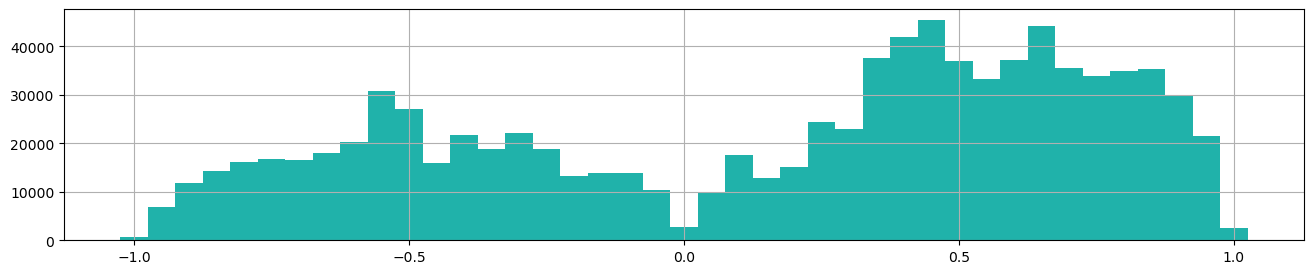

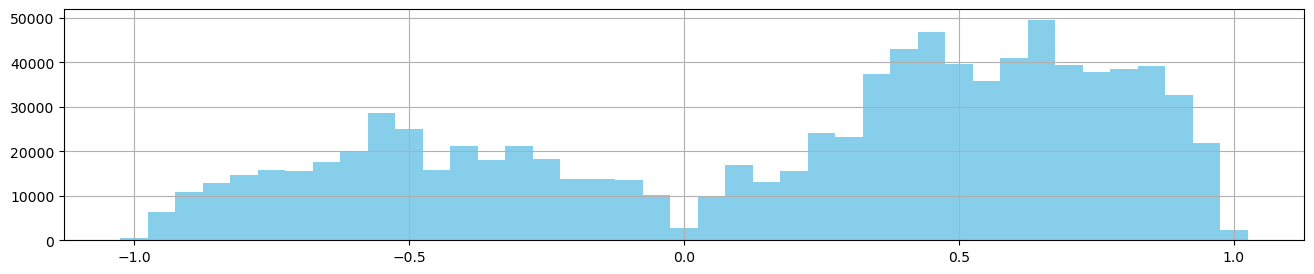

In [48]:
# Check if it worked
# Depression cohort
d_cohort["VADER"].hist(bins=np.arange(-1.025, 1.075, 0.05), figsize=(16, 3), ec="k", lw=1, color="lightseagreen")
plt.show()

# Anxiety cohort
a_cohort["VADER"].hist(bins=np.arange(-1.025, 1.075, 0.05), figsize=(16, 3), ec="k", lw=1, color="skyblue")
plt.show()

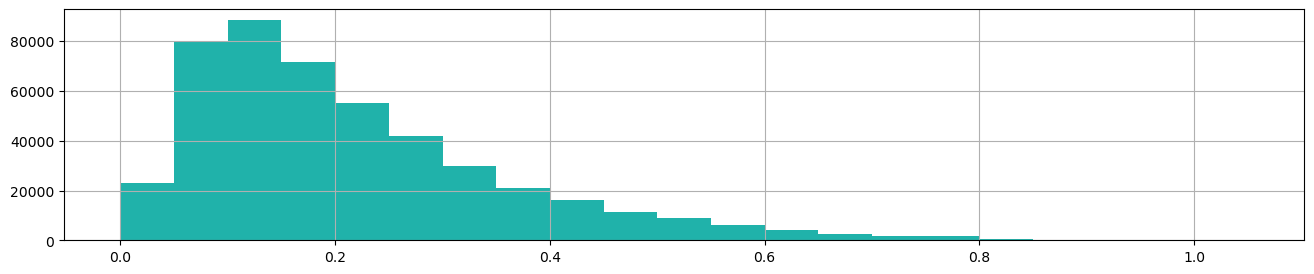

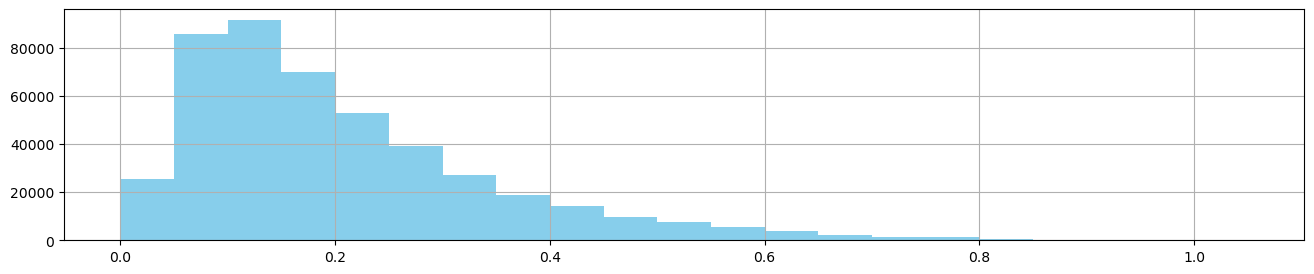

In [49]:
# Depression cohort
d_cohort["VADER_NEG"].hist(bins=np.arange(0.0, 1.075, 0.05), figsize=(16, 3), ec="k", lw=1, color="lightseagreen")
plt.show()

# Anxiety cohort
a_cohort["VADER_NEG"].hist(bins=np.arange(0.0, 1.075, 0.05), figsize=(16, 3), ec="k", lw=1, color="skyblue")
plt.show()

### Drop some uneccesary columns for data/memory reduction

In [51]:
columns_to_drop = ['created_at', 'ANEW_Valence', 'ANEW_Dominance', 'ANEW_Arousal', 'Happiness', 'NRC_anger', 'NRC_anticipation', 'NRC_disgust', 'NRC_joy', 'NRC_joy', 'NRC_surprise', 'NRC_trust', 'NRC_negative', 'NRC_positive', 'NRC_fear', 'NRC_sadness', 'local_date', 'Afinn_Valence', 'OpinionFinder', 'tz']
d_cohort = d_cohort.drop(columns = columns_to_drop)
a_cohort = a_cohort.drop(columns = columns_to_drop)

In [52]:
d_cohort.head()

,tweet_id,user_id,VADER,sum_labeling,labeling_mislabeling,sum_catastrophising,catastrophising,sum_dichotomous,dichotomous_reasoning,sum_emotional,emotional_reasoning,sum_disqualifying,disqualifying_positive,sum_magnification,magnification_minimisation,sum_filtering,mental_filtering,sum_mindreading,mindreading,sum_fortune,fortunetelling,sum_overgeneralisation,overgeneralisation,sum_personalisation,personalisation,sum_should,should_statements,CDS_present,local_time,created_at_hour,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_of_week,day_of_week_name,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,CDS_hour_0,CDS_hour_1,CDS_hour_2,CDS_hour_3,CDS_hour_4,CDS_hour_5,CDS_hour_6,CDS_hour_7,CDS_hour_8,CDS_hour_9,CDS_hour_10,CDS_hour_11,CDS_hour_12,CDS_hour_13,CDS_hour_14,CDS_hour_15,CDS_hour_16,CDS_hour_17,CDS_hour_18,CDS_hour_19,CDS_hour_20,CDS_hour_21,CDS_hour_22,CDS_hour_23,Friday_anticipation,Saturday_anticipation,Sunday_anticipation,Monday_anticipation,Friday_fear,Saturday_fear,Sunday_fear,Monday_fear,VADER_NEG,VADER_NEU,VADER_POS
0,tD0732736,uDEP010,NaN,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,1.000,True,True,2020-07-07 19:00:05+01:00,19,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,Tuesday,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,1.000,NaN
1,tD0732737,uDEP010,0.763,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,False,2020-07-07 18:22:43+01:00,18,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,Tuesday,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN
2,tD0732738,uDEP010,-0.542,0.000,False,0.000,False,1.000,True,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,True,2020-07-07 18:21:22+01:00,18,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,Tuesday,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.257,0.743,NaN
3,tD0732739,uDEP010,NaN,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,False,2020-07-07 18:16:29+01:00,18,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,Tuesday,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,1.000,NaN
4,tD0732740,uDEP010,NaN,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,0.000,False,False,2020-07-07 18:05:31+01:00,18,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1,Tuesday,False,False,F

# Save these datasets

In [ ]:
d_cohort.to_csv('../Data/Combined_sets/depression_processed_cohort_tz_final.tsv', sep='\t')
a_cohort.to_csv('../Data/Combined_sets/anxiety_processed_cohort_tz_final.tsv', sep='\t')